In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

Problem Statement 1:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?
1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer
1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?
1.4 Are there any outliers in the data?
1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective




In [4]:
#Reading the csv file

df1 = pd.read_csv('Wholesale Customer.csv')

# Basic EDA

In [5]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [8]:
df1.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [9]:
df1.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False


In [10]:
df1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [11]:
df1.isnull().sum().sum()

0

In [133]:
df1.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

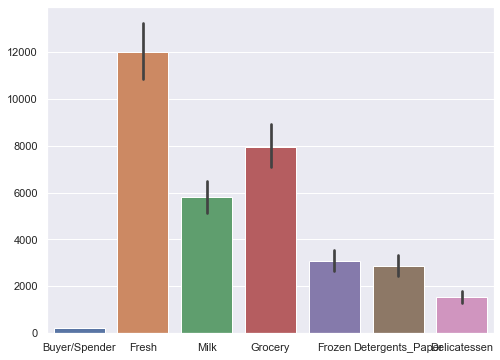

In [69]:
sns.barplot(data=df1)

In [12]:
df2=df1.groupby(['Region'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().reset_index()
df2

D:\PYTHON\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,854833,422454,570037,231026,204136,104327
1,Oporto,464721,239144,433274,190132,173311,54506
2,Other,3960577,1888759,2495251,930492,890410,512110


In [76]:
dfplot=df1.groupby(['Channel'])
dfplot

In [73]:
df3=df1.groupby(['Channel'])['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].sum().reset_index()
df3

D:\PYTHON\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,4015717,1028614,1180717,1116979,235587,421955
1,Retail,1264414,1521743,2317845,234671,1032270,248988


1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

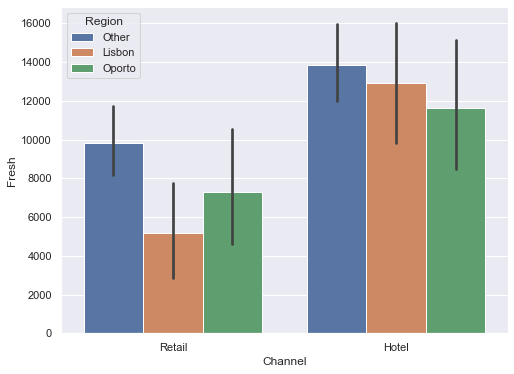

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x=df1.Channel, y=df1.Fresh, hue=df1.Region)

plt.show()

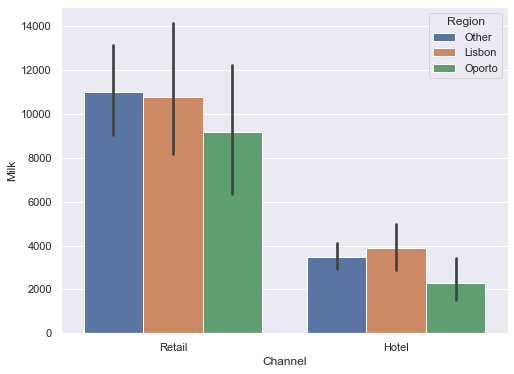

In [139]:
sns.barplot(x=df1.Channel, y=df1.Milk, hue=df1.Region, ax=None)

plt.show()

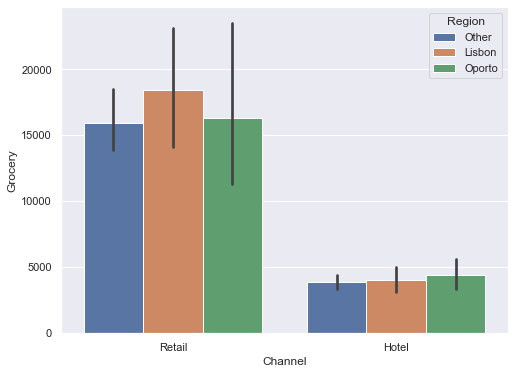

In [15]:
sns.barplot(x=df1.Channel, y=df1.Grocery, hue=df1.Region, ax=None)

plt.show()

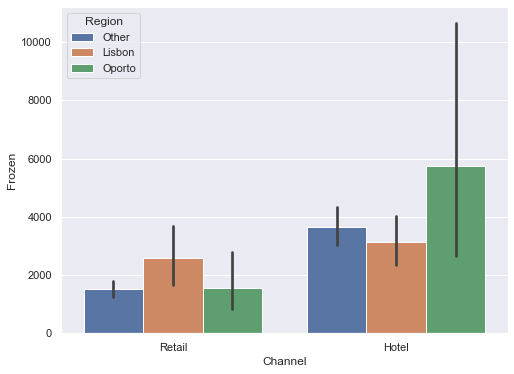

In [16]:
sns.barplot(x=df1.Channel, y=df1.Frozen, hue=df1.Region, ax=None)

plt.show()

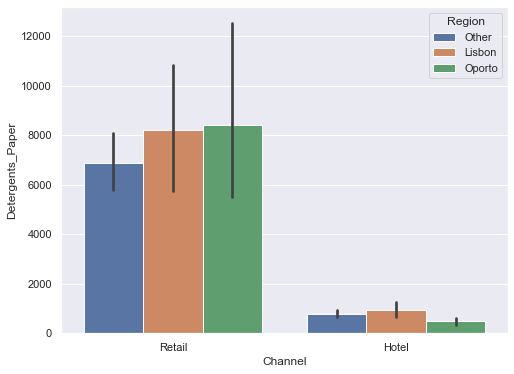

In [17]:
sns.barplot(x=df1.Channel, y=df1.Detergents_Paper, hue=df1.Region, ax=None)

plt.show()

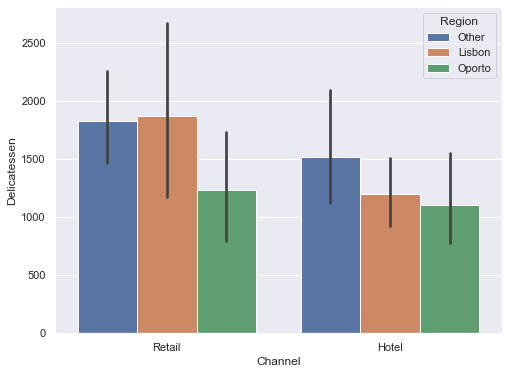

In [143]:
sns.barplot(x=df1.Channel, y=df1.Delicatessen, hue=df1.Region, ax=None)

plt.show()

In [18]:
df1['Fresh'].std()

12647.328865076894

In [19]:
df1['Milk'].std()

7380.377174570843

In [146]:
df1['Grocery'].std()

9503.162828994346

In [20]:
df1['Frozen'].std()

4854.673332592367

In [21]:
df1['Detergents_Paper'].std()

4767.8544479042

In [22]:
df1['Delicatessen'].std()

2820.1059373693975

In [23]:
df1['Fresh'].mean()

12000.297727272728

In [24]:
df1['Milk'].mean()

5796.265909090909

In [25]:
df1['Grocery'].mean()

7951.277272727273

In [167]:
df1['Frozen'].mean()

3071.931818181818

In [26]:
df1['Detergents_Paper'].mean()

2881.4931818181817

In [27]:
df1['Delicatessen'].mean()

1524.8704545454545

In [28]:
dfnew=df1.drop(columns=['Buyer/Spender', 'Channel', 'Region'])
dfnew

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


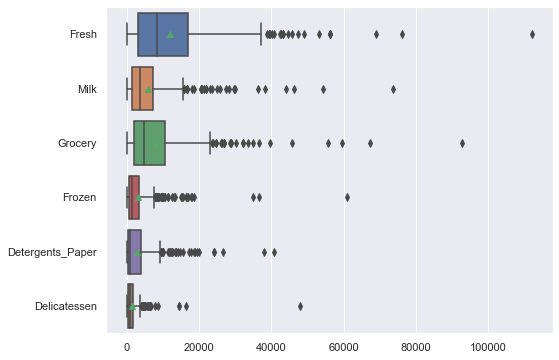

In [29]:
sns.boxplot(data = dfnew, showmeans = True, orient = 'h')
plt.show()

Problem 2 - (Download Data)
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).
2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major
2.1.2. Gender and Grad Intention
2.1.3. Gender and Employment
2.1.4. Gender and Computer
2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.2.1. What is the probability that a randomly selected CMSU student will be male?
2.2.2. What is the probability that a randomly selected CMSU student will be female?
2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.3.1. Find the conditional probability of different majors among the male students in CMSU.
2.3.2 Find the conditional probability of different majors among the female students of CMSU.
2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 
2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?
2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?
2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data
2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.
2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.


In [30]:
#Reading the csv file

df2 = pd.read_csv('Survey-1.csv')

BASIC EDA

In [31]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [172]:
df2.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [32]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [136]:
df2.isnull().sum

<bound method DataFrame.sum of        ID  Gender    Age  Class  Major  Grad Intention    GPA  Employment  \
0   False   False  False  False  False           False  False       False   
1   False   False  False  False  False           False  False       False   
2   False   False  False  False  False           False  False       False   
3   False   False  False  False  False           False  False       False   
4   False   False  False  False  False           False  False       False   
..    ...     ...    ...    ...    ...             ...    ...         ...   
57  False   False  False  False  False           False  False       False   
58  False   False  False  False  False           False  False       False   
59  False   False  False  False  False           False  False       False   
60  False   False  False  False  False           False  False       False   
61  False   False  False  False  False           False  False       False   

    Salary  Social Networking  Satisfaction 

In [137]:
df2.isnull().sum().sum

<bound method Series.sum of ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64>

In [138]:
df2.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [33]:
pd.crosstab(df2['Gender'],df2['Major'], margins='True')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [34]:
pd.crosstab(df2['Gender'],df2['Grad Intention'], margins='True')

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [178]:
pd.crosstab(df2['Gender'],df2['Employment'], margins='True')

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [35]:
pd.crosstab(df2['Gender'],df2['Computer'], margins='True')

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [37]:
n=62
F=33
M=29

print('The Probability of randomly selected CMSU student will be Male is',round(M/n, 5)*100, '%')

The Probability of randomly selected CMSU student will be Male is 46.774 %


In [38]:
print('The Probability of randomly selected CMSU student will be Female is',round(F/n, 5)*100, '%')

The Probability of randomly selected CMSU student will be Female is 53.226 %


In [39]:
pd.crosstab(df2['Gender'],df2['Major'], margins='True')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [40]:
print('The Probability of Male in Accounting is', round(4/29, 5)*100, '%')

The Probability of Male in Accounting is 13.793 %


In [41]:
print('The Probability of Male in CIS is', round(1/29, 5)*100, '%')

The Probability of Male in CIS is 3.4479999999999995 %


In [42]:
print('The Probability of Male in Economics/Finance is', round(4/29, 5)*100, '%')

The Probability of Male in Economics/Finance is 13.793 %


In [43]:
print('The Probability of Male in International Business is', round(2/29, 5)*100, '%')

The Probability of Male in International Business is 6.897 %


In [44]:
print('The Probability of Male in Management is', round(6/29, 5)*100, '%')

The Probability of Male in Management is 20.69 %


In [45]:
print('The Probability of Male in Other is', round(4/29, 5)*100, '%')

The Probability of Male in Other is 13.793 %


In [46]:
print('The Probability of Male in Retailing/Marketing is', round(5/29, 5)*100, '%')

The Probability of Male in Retailing/Marketing is 17.241 %


In [47]:
print('The Probability of Male in Undecided is', round(3/29, 5)*100, '%')

The Probability of Male in Undecided is 10.345 %


In [48]:
print('The Probability of Female in Accounting is', round(3/33, 5)*100, '%')

The Probability of Female in Accounting is 9.091000000000001 %


In [49]:
print('The Probability of Female in CIS is', round(3/33, 5)*100, '%')

The Probability of Female in CIS is 9.091000000000001 %


In [213]:
print('The Probability of Female in Economics/Finance is', round(7/33, 5)*100, '%')

The Probability of Female in Economics/Finance is 21.212 %


In [211]:
print('The Probability of Female in International Business is', round(4/33, 5)*100, '%')

The Probability of Female in International Business is 12.121 %


In [50]:
print('The Probability of Female in Management is', round(4/33, 5)*100, '%')

The Probability of Female in Management is 12.121 %


In [51]:
print('The Probability of Female in Other is', round(3/33, 5)*100, '%')

The Probability of Female in Other is 9.091000000000001 %


In [52]:
print('The Probability of Female in Retailing/Marketing is', round(9/33, 5)*100, '%')

The Probability of Female in Retailing/Marketing is 27.272999999999996 %


In [81]:
dfind=pd.crosstab(df2['Grad Intention'],df2['Gender'])
dfind

Gender,Female,Male
Grad Intention,,
No,9,3
Undecided,13,9
Yes,11,17


In [82]:
dfind.drop(index='Undecided')

Gender,Female,Male
Grad Intention,,
No,9,3
Yes,11,17


In [54]:
print('Probability that a randomly chosen student is a Male and intends to graduate is', round(17/62, 5)*100, '%')

Probability that a randomly chosen student is a Male and intends to graduate is 27.419 %


In [55]:
pd.crosstab(df2['Computer'],df2['Gender'], margins='True')

Gender,Female,Male,All
Computer,,,
Desktop,2,3,5
Laptop,29,26,55
Tablet,2,0,2
All,33,29,62


In [56]:
print('Probability that a randomly selected student is a Female and does not have a laptop is', round(4/62, 4)*100, '%')

Probability that a randomly selected student is a Female and does not have a laptop is 6.45 %


In [57]:
pd.crosstab(df2['Gender'],df2['Employment'], margins='True')

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [86]:
pd.crosstab(df2['Gender'],df2['GPA'], margins='True')

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [87]:
pd.crosstab(df2['Gender'],df2['Salary'], margins='True')

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


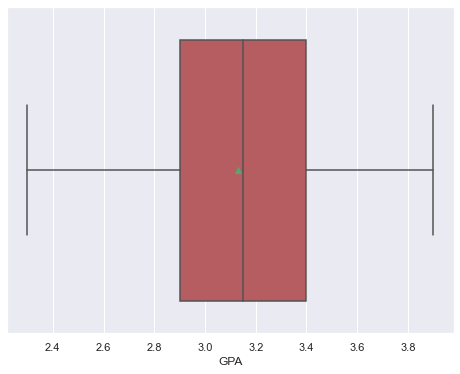

In [95]:
sns.boxplot(df2.GPA, showmeans = True, orient = 'h', color='r')
plt.show()

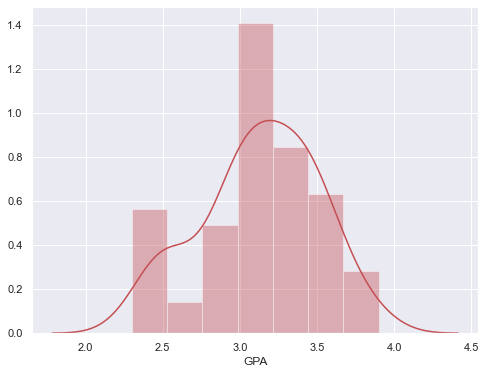

In [104]:
sns.distplot(df2.GPA, color='r')

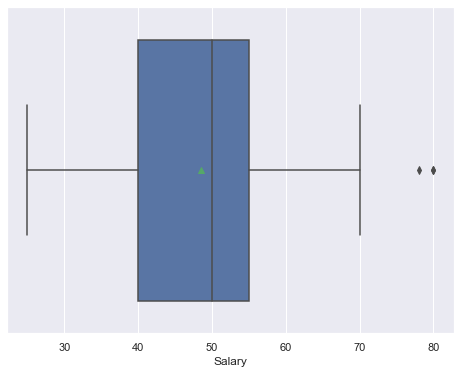

In [103]:
sns.boxplot(df2.Salary, showmeans = True, orient = 'h', color='b')
plt.show()

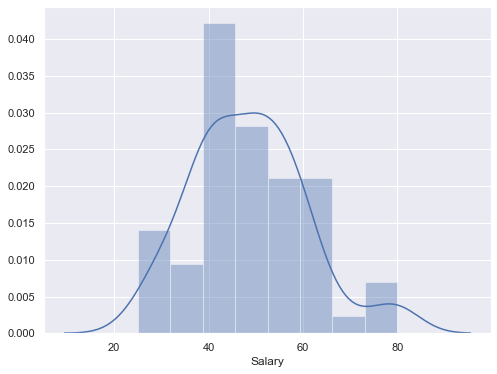

In [105]:
sns.distplot(df2.Salary, color='b')

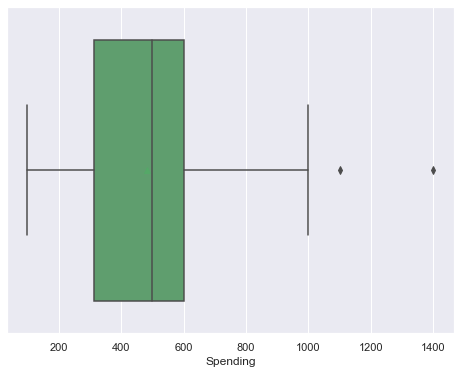

In [97]:
sns.boxplot(df2.Spending, showmeans = True, orient = 'h', color='g')
plt.show()

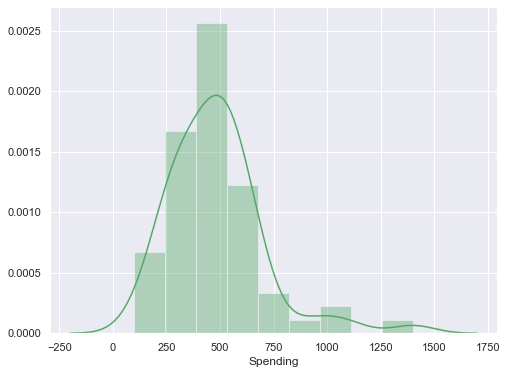

In [106]:
sns.distplot(df2.Spending, color='g')

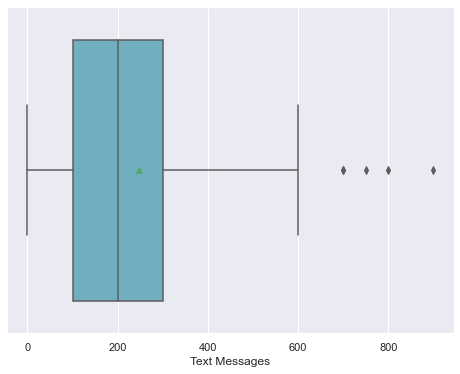

In [101]:
sns.boxplot(df2['Text Messages'], showmeans = True, orient = 'h', color='c')
plt.show()

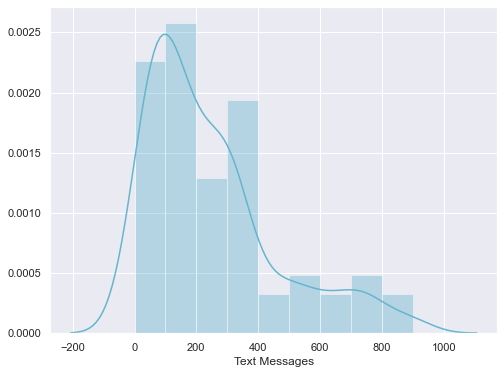

In [107]:
sns.distplot(df2['Text Messages'], color='c')

In [108]:
from scipy.stats import shapiro

In [ ]:
# H0: Data is normal
# H1: Data is not normally distributed

In [110]:
shapiro(df2.GPA)

(0.9685361981391907, 0.11204058676958084)

In [111]:
shapiro(df2.Salary)

(0.9565856456756592, 0.028000956401228905)

In [112]:
shapiro(df2.Spending)

(0.8777452111244202, 1.6854661225806922e-05)

In [113]:
shapiro(df2['Text Messages'])

(0.8594191074371338, 4.324040673964191e-06)

In [121]:
dfcorr=df2[['GPA', 'Salary', 'Spending', 'Text Messages']]
dfcorr

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [122]:
dfcorr.corr()

,GPA,Salary,Spending,Text Messages
GPA,1.000000,-0.308643,-0.343403,0.042195
Salary,-0.308643,1.000000,0.003402,-0.073640
Spending,-0.343403,0.003402,1.000000,0.028489
Text Messages,0.042195,-0.073640,0.028489,1.000000


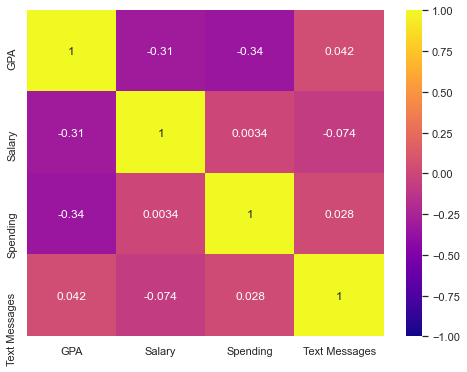

In [124]:
sns.heatmap(dfcorr.corr(), annot=True, cmap='plasma', vmin=-1, vmax=1)

Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


In [125]:
#Reading the csv file and Basic EDA

df3=pd.read_csv('A+&+B+shingles.csv')

In [126]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [127]:
df3.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [139]:
df3.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [130]:
df3.dtypes

A    float64
B    float64
dtype: object

In [131]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [132]:
df3.isnull().sum

<bound method DataFrame.sum of         A      B
0   False  False
1   False  False
2   False  False
3   False  False
4   False  False
5   False  False
6   False  False
7   False  False
8   False  False
9   False  False
10  False  False
11  False  False
12  False  False
13  False  False
14  False  False
15  False  False
16  False  False
17  False  False
18  False  False
19  False  False
20  False  False
21  False  False
22  False  False
23  False  False
24  False  False
25  False  False
26  False  False
27  False  False
28  False  False
29  False  False
30  False  False
31  False   True
32  False   True
33  False   True
34  False   True
35  False   True>

In [141]:
t_statistic, p_value = ttest_1samp(df3['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [151]:
t_statistic, p_value = ttest_1samp(df3['B'], 0.35, nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638365 


In [149]:
t_statistic, p_value  = ttest_ind(df3['A'],df3['B'], nan_policy = 'omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306
